# Data Wrangling Template

# Table of Contents
<ul>
<li><a href="#Gathering">Gathering</a></li>
<li><a href="#Assessing">Assessing</a></li>
<li><a href="#Cleaning">Cleaning</a></li>
<li><a href="#MD">Merged Dataset</a></li>
<li><a href="#SD">Storing Data</a></li>
<li><a href="#Questions">Questions</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

## Gathering

- Twitter archive file: download this file manually by clicking the following link: twitter_archive_enhanced.csv

- The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

- Twitter API & JSON: Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [1]:
# Import the required libraries
import tweepy
from IPython.display import Image
from tweepy import OAuthHandler
from timeit import default_timer as timer
import requests
import json
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Reading the csv file already provided
archive_df = pd.read_csv(r"C:\Users\Chinedu\Documents\Data Analytics\Data Wrangling\twitter-archive-enhanced.csv")
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Downloading the  tweet image predictions programmatically
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open("image_predictions.tsv", mode = "wb") as file:
    file.write(response.content)

#Reading the tsv file
image_prediction = pd.read_csv('image_predictions.tsv', sep='\t' )
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
# saving the json.txt file in a DataFrame
tweet_json = []
with open('tweet_json.txt') as f:
    for line in f:
        tweet_json.append(json.loads(line))
tweets= pd.DataFrame(tweet_json)
tweets.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [5]:
# Viewing the columns
tweets.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [6]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2327 non-null   object 
 1   id                             2327 non-null   int64  
 2   id_str                         2327 non-null   object 
 3   full_text                      2327 non-null   object 
 4   truncated                      2327 non-null   bool   
 5   display_text_range             2327 non-null   object 
 6   entities                       2327 non-null   object 
 7   extended_entities              2057 non-null   object 
 8   source                         2327 non-null   object 
 9   in_reply_to_status_id          77 non-null     float64
 10  in_reply_to_status_id_str      77 non-null     object 
 11  in_reply_to_user_id            77 non-null     float64
 12  in_reply_to_user_id_str        77 non-null     o

# Assessing

The three datas to assess are:
- archive_df
- image_prediction
- tweets_df

## Visual Assessment
Visual assessment on the data without the use of codes.

## archive_df

In [7]:
# The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets,
# The columns contain the dog rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo).
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## image_prediction

In [8]:
image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
293,671347597085433856,https://pbs.twimg.com/media/CVEbFDRWsAAkN_7.jpg,1,picket_fence,0.382918,False,rain_barrel,0.108809,False,plastic_bag,0.038878,False
1476,780496263422808064,https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg,1,pug,0.997310,True,Brabancon_griffon,0.001186,True,French_bulldog,0.000428,True
412,673919437611909120,https://pbs.twimg.com/media/CVo-JuMWwAAet6F.jpg,1,jack-o'-lantern,0.172079,False,schipperke,0.115984,True,miniature_pinscher,0.052175,True
168,668988183816871936,https://pbs.twimg.com/media/CUi5M7TXIAAY0gj.jpg,1,Arabian_camel,0.999614,False,bison,0.000228,False,llama,0.000067,False
1617,802323869084381190,https://pbs.twimg.com/media/CyJtSmDUAAA2F9x.jpg,4,home_theater,0.765069,False,television,0.203578,False,entertainment_center,0.018644,False


## tweets

In [9]:
# Contains the number of favourite count and retweet count
tweets.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


## Programmatic Assessment
 pandas' functions and/or methods are used to assess the data.

## archive_df

In [10]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
# Knowing the number of denominator that is not 10
den = archive_df[archive_df["rating_denominator"] != 10]
den

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [12]:
# checking if any denominator is equal to zero and why
archive_df[archive_df["rating_denominator"] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [13]:
# checking any numerator is equal to zero and why
archive_df[archive_df["rating_numerator"]== 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [14]:
archive_df.iloc[207].text
archive_df.iloc[1016].text

"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX"

In [15]:
# viewing the names of the dogs
archive_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [16]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
archive_df.duplicated().sum()

0

## image_prediction

In [18]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
# A function to generate the image
def image(url):
    return Image(url=url)

In [20]:
# checking the image of the numerator is equal to zero
# Understanding the numerator and denominators
image_prediction.iloc[315].jpg_url

'https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg'

In [21]:
image(" https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg" )

In [22]:
image_prediction.iloc[1016].jpg_url

'https://pbs.twimg.com/media/CdoTbL_XIAAitq2.jpg'

In [23]:
image("https://pbs.twimg.com/media/CdoTbL_XIAAitq2.jpg")

In [24]:
image_prediction.iloc[313].jpg_url

'https://pbs.twimg.com/media/CVHdK-7WwAAsuyc.jpg'

In [25]:
image("https://pbs.twimg.com/media/CVHdK-7WwAAsuyc.jpg" )

In [26]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
# This file includes dog classifications, tweet_id, image URL
image_prediction.jpg_url.isnull().sum()

0

In [28]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## tweets

In [29]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2327 non-null   object 
 1   id                             2327 non-null   int64  
 2   id_str                         2327 non-null   object 
 3   full_text                      2327 non-null   object 
 4   truncated                      2327 non-null   bool   
 5   display_text_range             2327 non-null   object 
 6   entities                       2327 non-null   object 
 7   extended_entities              2057 non-null   object 
 8   source                         2327 non-null   object 
 9   in_reply_to_status_id          77 non-null     float64
 10  in_reply_to_status_id_str      77 non-null     object 
 11  in_reply_to_user_id            77 non-null     float64
 12  in_reply_to_user_id_str        77 non-null     o

In [30]:
tweets.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,quoted_status_id
count,2.327000e+03,7.700000e+01,7.700000e+01,2327.000000,2327.000000,2.600000e+01
mean,7.417930e+17,7.440692e+17,2.040329e+16,2476.117318,7063.727116,8.113972e+17
std,6.820795e+16,7.524295e+16,1.260797e+17,4192.874087,10976.976730,6.295843e+16
min,6.660209e+17,6.658147e+17,1.185634e+07,1.000000,0.000000,6.721083e+17
25%,6.781394e+17,6.757073e+17,3.589728e+08,496.500000,1226.500000,7.761338e+17
50%,7.178418e+17,7.032559e+17,4.196984e+09,1152.000000,3053.000000,8.281173e+17
75%,7.986547e+17,8.233264e+17,4.196984e+09,2866.000000,8617.000000,8.637581e+17
max,8.924206e+17,8.862664e+17,8.405479e+17,70905.000000,145098.000000,8.860534e+17


In [31]:
# viewing the different columns in the different dataset
print(tweets.columns)
print(image_prediction.columns)
print(archive_df.columns)

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')
Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')
Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'exp

In [32]:
tweets.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [33]:
len(image_prediction.columns)

12

In [34]:
len(archive_df.columns)

17

# Quality
- Dropping columns that won't be used for analysis
- Erroneous datatypes (doggo, floofer, pupper and puppo columns)
- Editing the timestamp
- Creating a ratings column(numerator/denominator)
- Creating a column for the month and year
- Replacing wrong words for name as "None"
- Create 1 column for dog type and 1 column for probability rate
- Dog stage to a categorical column




# Tidiness
- Merging all three tables on the tweet_id
- Renaming the id column in the tweet data to tweet_id to merge with other dataset

# Cleaning

#### Define
- Creating copies of the original dataset

In [35]:
# creating copies of the original dataset
archive_copy = archive_df.copy()
image_copy = image_prediction.copy()
tweets_copy = tweets

## Quality

### 1. Dropping irrelavant columns

### archive_df

#### Define
- Dropping irrelevant data in the twitter acrhive dataset(archive_df)

#### Code

In [36]:
# Dropping columns
archive_copy = archive_copy.drop(["source","in_reply_to_status_id",
                                                    "in_reply_to_user_id",
                                                    "retweeted_status_id",
                                                    "retweeted_status_user_id", 
                                                    "retweeted_status_timestamp", 
                                                    "expanded_urls"], axis = 1)

#### Test

In [37]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   text                2356 non-null   object
 3   rating_numerator    2356 non-null   int64 
 4   rating_denominator  2356 non-null   int64 
 5   name                2356 non-null   object
 6   doggo               2356 non-null   object
 7   floofer             2356 non-null   object
 8   pupper              2356 non-null   object
 9   puppo               2356 non-null   object
dtypes: int64(3), object(7)
memory usage: 184.2+ KB


### 2.Erroneous datatypes (doggo, floofer, pupper and puppo columns)

#### Define
- Creating a new column for the dog stages
- Dropping duplicate data

#### Code

In [38]:
# Melting the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column
# Dropping duplicate rows and using tweet_id as the subset
archive_copy = pd.melt(archive_copy, id_vars=["tweet_id","timestamp","text",
                                              "rating_numerator","rating_denominator","name"],var_name="dogs",
                       value_name="dog_stage")

archive_copy = archive_copy.sort_values("dog_stage").drop_duplicates(subset="tweet_id",keep="last")
archive_copy.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs,dog_stage
3227,761599872357261312,2016-08-05 16:28:54 +0000,"This is Sephie. According to this picture, she...",11,10,Sephie,floofer,None
4768,881536004380872706,2017-07-02 15:32:16 +0000,Here is a pupper approaching maximum borkdrive...,14,10,a,pupper,pupper
4250,674743008475090944,2015-12-10 00:10:43 +0000,This is Sophie. She just saw a spider. 10/10 d...,10,10,Sophie,floofer,None
67,879376492567855104,2017-06-26 16:31:08 +0000,This is Jack AKA Stephen Furry. You're not sco...,12,10,Jack,doggo,None
6140,697616773278015490,2016-02-11 03:02:54 +0000,This pupper doubles as a hallway rug. Very rar...,11,10,None,pupper,pupper


In [39]:
# dropping the dogs column
archive_copy = archive_copy.drop("dogs", axis=1)

#### Test

In [40]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2259 to 7236
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   text                2356 non-null   object
 3   rating_numerator    2356 non-null   int64 
 4   rating_denominator  2356 non-null   int64 
 5   name                2356 non-null   object
 6   dog_stage           2356 non-null   object
dtypes: int64(3), object(4)
memory usage: 147.2+ KB


### 3. Editing the timestamp

#### Define
- Changing the timestamp column to a datetime

#### Code

In [41]:
archive_copy.timestamp = pd.to_datetime(archive_copy["timestamp"]).dt.date.astype("datetime64[ns]")
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2259 to 7236
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   int64         
 1   timestamp           2356 non-null   datetime64[ns]
 2   text                2356 non-null   object        
 3   rating_numerator    2356 non-null   int64         
 4   rating_denominator  2356 non-null   int64         
 5   name                2356 non-null   object        
 6   dog_stage           2356 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 147.2+ KB


#### Test

In [42]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2259 to 7236
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   int64         
 1   timestamp           2356 non-null   datetime64[ns]
 2   text                2356 non-null   object        
 3   rating_numerator    2356 non-null   int64         
 4   rating_denominator  2356 non-null   int64         
 5   name                2356 non-null   object        
 6   dog_stage           2356 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 147.2+ KB


### 4.Creating a ratings column(numerator/denominator)

#### Define
- Creating a new rating column, which is the numerator divided by the denominator

#### Code

In [43]:
# creating a new new column for the ratings
archive_copy["ratings"] = archive_copy["rating_numerator"]/archive_copy["rating_denominator"]

#### Test

In [44]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2259 to 7236
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   int64         
 1   timestamp           2356 non-null   datetime64[ns]
 2   text                2356 non-null   object        
 3   rating_numerator    2356 non-null   int64         
 4   rating_denominator  2356 non-null   int64         
 5   name                2356 non-null   object        
 6   dog_stage           2356 non-null   object        
 7   ratings             2356 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 165.7+ KB


### 5.Creating a column for the month and year

#### Define
- Creating a new column for the rating month and year

#### Code

In [45]:
# Extracting the month and year from the timestamp column
archive_copy["month"] = pd.DatetimeIndex(archive_copy.timestamp).month
archive_copy["year"] = pd.DatetimeIndex(archive_copy.timestamp).year

In [46]:
# combining the month and year to creatin a new datetime frame
archive_copy["rating_month_year"] = archive_copy["month"].astype(str)+"/"+archive_copy["year"].astype(str)
archive_copy["rating_month_year"] = pd.to_datetime(archive_copy["rating_month_year"] )

In [47]:
# Dropping the irrelevant columns
archive_copy.drop(["month","year"],axis=1, inplace  = True)

#### Test

In [48]:
archive_copy.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,ratings,rating_month_year
2259,667550904950915073,2015-11-20,RT @dogratingrating: Exceptional talent. Origi...,12,10,None,None,1.2,2015-11-01
2260,667550882905632768,2015-11-20,RT @dogratingrating: Unoriginal idea. Blatant ...,5,10,None,None,0.5,2015-11-01
2261,667549055577362432,2015-11-20,Never seen dog like this. Breathes heavy. Tilt...,1,10,None,None,0.1,2015-11-01
2262,667546741521195010,2015-11-20,Here is George. George took a selfie of his ne...,9,10,George,None,0.9,2015-11-01
2263,667544320556335104,2015-11-20,"This is Kial. Kial is either wearing a cape, w...",10,10,Kial,None,1.0,2015-11-01


### 6.Replacing wrong words for name as "None"

#### Define
- Viewing the names of the dogs and checking for any mispelt name and replacing it with "None"

#### Code

In [49]:
# Visually checking the unique names
archive_copy.name.unique()

array(['None', 'George', 'Kial', 'a', 'Frank', 'Dook', 'Hall', 'Philippe',
       'Naphaniel', 'Olive', 'Otis', 'Cleopatricia', 'Erik', 'Stu',
       'Tedrick', 'Calvin', 'Filup', 'Shaggy', 'Reese', 'Cupcake',
       'Clybe', 'Dave', 'Keet', 'Gabe', 'Klevin', 'Jeph', 'Jockson',
       'Carll', 'Pipsy', 'Bradlay', 'Biden', 'Fwed', 'Genevieve',
       'Joshwa', 'Timison', 'Clarence', 'Kenneth', 'Churlie', 'Jiminy',
       'Alfie', 'Rusty', 'Sophie', 'Jareld', 'Bisquick', 'Ron',
       'Skittles', 'Torque', 'DayZ', 'Jo', 'Kallie', 'the', 'Marvin',
       'Spark', 'Gòrdón', 'Josep', 'Lugan', 'an', 'Christoper', 'Jimothy',
       'Kreggory', 'Scout', 'Walter', 'quite', 'Phineas', 'Monkey', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Emmy', 'Shadow', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Gerald', 'Mingus', 'Waffles', 'Jimbo', 'Maisey', 'Derek',
       'Ralphus', 'Zeke', 'Tilly', 'Archie', 'Darla', 'Franklin', 'Jax',
       '

In [50]:
no_names = ["a", "an", "the", "just", "one", "very", "quite", "not", "actually", 
             "mad", "space", "infuriating", "all", "officially", "0", "old", "life",
             "unacceptable", "my", "incredibly", "by", "his", "such"]
for names in archive_copy["name"]:
        for no_name in no_names:
            if names.lower() == no_name.lower():
                archive_copy["name"] = archive_copy.name.replace(names, "None")


#### Test

In [51]:
archive_copy.name.value_counts()

None       850
Charlie     12
Cooper      11
Lucy        11
Oliver      11
          ... 
Zeus         1
Jazzy        1
Trigger      1
Bruiser      1
Chef         1
Name: name, Length: 935, dtype: int64

In [52]:
archive_copy.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,ratings,rating_month_year
2259,667550904950915073,2015-11-20,RT @dogratingrating: Exceptional talent. Origi...,12,10,None,None,1.2,2015-11-01
2260,667550882905632768,2015-11-20,RT @dogratingrating: Unoriginal idea. Blatant ...,5,10,None,None,0.5,2015-11-01
2261,667549055577362432,2015-11-20,Never seen dog like this. Breathes heavy. Tilt...,1,10,None,None,0.1,2015-11-01
2262,667546741521195010,2015-11-20,Here is George. George took a selfie of his ne...,9,10,George,None,0.9,2015-11-01
2263,667544320556335104,2015-11-20,"This is Kial. Kial is either wearing a cape, w...",10,10,Kial,None,1.0,2015-11-01


## image_prediction

### 7.Create one column for dog type and one column for probability rate

#### Define
- Making new column for the dog type and their probability rate

#### Code

In [53]:
#createing a function to check whether or not the dog prediction is true and adding it to a list and also the confidence rate
dog_type = []
probability_rate = []
def image(image_copy):
    if image_copy["p1_dog"] == True:
        dog_type.append(image_copy["p1"])
        probability_rate.append(image_copy['p1_conf'])
    elif image_copy["p2_dog"] == True:
        dog_type.append(image_copy["p2"])
        probability_rate.append(image_copy["p2_conf"])
    elif image_copy["p3_dog"] == True:
        dog_type.append(image_copy["p3"])
        probability_rate.append(image_copy["p3_conf"])
    else:
        dog_type.append("Error")
        probability_rate.append("Error")

# Appling the function       
image_copy.apply(image, axis=1)

#create new columns
image_copy["dog_type"] = dog_type
image_copy["probability_rate"] = probability_rate

In [54]:
#drop rows that has prediction_list 'error'
image_copy = image_copy[image_copy["dog_type"] != "Error"]

#TEST: 
image_copy[["dog_type","probability_rate"]]

,dog_type,probability_rate
0,Welsh_springer_spaniel,0.465074
1,redbone,0.506826
2,German_shepherd,0.596461
3,Rhodesian_ridgeback,0.408143
4,miniature_pinscher,0.560311
...,...,...
2069,Chesapeake_Bay_retriever,0.425595
2070,basset,0.555712
2071,Labrador_retriever,0.168086
2072,Chihuahua,0.716012


In [55]:
# checking the column
image_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1751 non-null   int64  
 1   jpg_url           1751 non-null   object 
 2   img_num           1751 non-null   int64  
 3   p1                1751 non-null   object 
 4   p1_conf           1751 non-null   float64
 5   p1_dog            1751 non-null   bool   
 6   p2                1751 non-null   object 
 7   p2_conf           1751 non-null   float64
 8   p2_dog            1751 non-null   bool   
 9   p3                1751 non-null   object 
 10  p3_conf           1751 non-null   float64
 11  p3_dog            1751 non-null   bool   
 12  dog_type          1751 non-null   object 
 13  probability_rate  1751 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 169.3+ KB


In [56]:
# Dropping irrelevant data
image_copy = image_copy.drop(["img_num","p1_dog","p2_dog","p3_dog","p1","p2","p3","p1_conf","p2_conf","p3_conf"], axis = 1)

In [57]:
image_copy.dog_type.value_counts()

golden_retriever      173
Labrador_retriever    113
Pembroke               96
Chihuahua              95
pug                    65
                     ... 
Scotch_terrier          1
clumber                 1
Irish_wolfhound         1
Japanese_spaniel        1
silky_terrier           1
Name: dog_type, Length: 113, dtype: int64

In [58]:
image_copy.head()

,tweet_id,jpg_url,dog_type,probability_rate
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


In [59]:
image_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          1751 non-null   int64 
 1   jpg_url           1751 non-null   object
 2   dog_type          1751 non-null   object
 3   probability_rate  1751 non-null   object
dtypes: int64(1), object(3)
memory usage: 68.4+ KB


### 8.  Dog stage to a categorical column

#### Define
- Making dog_stage a categorial column

#### Code

In [60]:
# Making the dog_stage column a categorial data
archive_copy["dog_stage"] = archive_copy["dog_stage"].astype("category")

#### Test

In [61]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2259 to 7236
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   int64         
 1   timestamp           2356 non-null   datetime64[ns]
 2   text                2356 non-null   object        
 3   rating_numerator    2356 non-null   int64         
 4   rating_denominator  2356 non-null   int64         
 5   name                2356 non-null   object        
 6   dog_stage           2356 non-null   category      
 7   ratings             2356 non-null   float64       
 8   rating_month_year   2356 non-null   datetime64[ns]
dtypes: category(1), datetime64[ns](2), float64(1), int64(3), object(2)
memory usage: 168.2+ KB


# Tidiness

### 1. Renaming the id column to tweet_id column

In [62]:
# renaming the id column
tweets.rename(columns = {'id':'tweet_id'}, inplace = True)

In [63]:
# Selecting the required columns
tweets_df = tweets[["tweet_id","favorite_count","retweet_count"]]
tweets_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33863,7024
1,892177421306343426,29366,5305
2,891815181378084864,22088,3488
3,891689557279858688,36989,7237
4,891327558926688256,35364,7775


### 2. Merging the dataset

#### Define
- Combining all three datasets together for easy handling.

#### Code

In [64]:
full_data = pd.merge(pd.merge(archive_copy,image_copy, on = "tweet_id"), tweets_copy, on = "tweet_id")

###  Test

In [65]:
# viewing few ros of the data
full_data.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,ratings,rating_month_year,jpg_url,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,667550904950915073,2015-11-20,RT @dogratingrating: Exceptional talent. Origi...,12,10,None,None,1.2,2015-11-01,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,...,False,False,False,False,en,{'created_at': 'Fri Nov 20 03:43:06 +0000 2015...,NaN,NaN,NaN,NaN
1,667546741521195010,2015-11-20,Here is George. George took a selfie of his ne...,9,10,George,None,0.9,2015-11-01,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,667544320556335104,2015-11-20,"This is Kial. Kial is either wearing a cape, w...",10,10,Kial,None,1.0,2015-11-01,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,667538891197542400,2015-11-20,This is a southwest Coriander named Klint. Hat...,9,10,None,None,0.9,2015-11-01,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,667534815156183040,2015-11-20,"This is Frank (pronounced ""Fronq""). Too many b...",8,10,Frank,None,0.8,2015-11-01,https://pbs.twimg.com/media/CUOPYI5UcAAj_nO.jpg,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


<a id='MD'></a>
# Merged Dataset

In [66]:
# viewing the informations of the data
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1736 entries, 0 to 1735
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tweet_id                       1736 non-null   int64         
 1   timestamp                      1736 non-null   datetime64[ns]
 2   text                           1736 non-null   object        
 3   rating_numerator               1736 non-null   int64         
 4   rating_denominator             1736 non-null   int64         
 5   name                           1736 non-null   object        
 6   dog_stage                      1736 non-null   category      
 7   ratings                        1736 non-null   float64       
 8   rating_month_year              1736 non-null   datetime64[ns]
 9   jpg_url                        1736 non-null   object        
 10  dog_type                       1736 non-null   object        
 11  probability_rate 

<a id='SD'></a>
# Storing Data

#### Code

In [67]:
# Saving it as csv
full_data.to_csv("twitter_archive_master.csv", index = False)

# Questions
- Which dog type have the highest and lowest ratings?
- What are the tweet rates up until August 1st, 2017
- Any relationship between the favourite and retweet
- Most popular dog_stage

<a id='eda'></a>
# Exploratory Data Analysis

In [68]:
# Reading our data
twitter_archive = pd.read_csv(r"twitter_archive_master.csv")

In [69]:
twitter_archive.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,ratings,rating_month_year,jpg_url,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,667550904950915073,2015-11-20,RT @dogratingrating: Exceptional talent. Origi...,12,10,None,None,1.2,2015-11-01,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,...,False,False,False,False,en,{'created_at': 'Fri Nov 20 03:43:06 +0000 2015...,NaN,NaN,NaN,NaN
1,667546741521195010,2015-11-20,Here is George. George took a selfie of his ne...,9,10,George,None,0.9,2015-11-01,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,667544320556335104,2015-11-20,"This is Kial. Kial is either wearing a cape, w...",10,10,Kial,None,1.0,2015-11-01,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,667538891197542400,2015-11-20,This is a southwest Coriander named Klint. Hat...,9,10,None,None,0.9,2015-11-01,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,667534815156183040,2015-11-20,"This is Frank (pronounced ""Fronq""). Too many b...",8,10,Frank,None,0.8,2015-11-01,https://pbs.twimg.com/media/CUOPYI5UcAAj_nO.jpg,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


## 1.Which dog type have the highest and lowest ratings?

In [70]:
# Getting the lowest ratings
ratings = twitter_archive.groupby("dog_type").mean()
ratings["ratings"].sort_values()

dog_type
Japanese_spaniel               0.500000
soft-coated_wheaten_terrier    0.880000
Scotch_terrier                 0.900000
Walker_hound                   0.900000
Tibetan_terrier                0.925000
                                 ...   
Tibetan_mastiff                1.240000
Pomeranian                     1.247619
Saluki                         1.250000
Bouvier_des_Flandres           1.300000
clumber                        2.700000
Name: ratings, Length: 113, dtype: float64

In [71]:
# Looking for Japanese_spaniel url to look at the picture
twitter_archive[twitter_archive["dog_type"] ==  "Japanese_spaniel"]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,ratings,rating_month_year,jpg_url,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
884,677301033169788928,2015-12-17,This is Juckson. He's totally on his way to a ...,5,10,Juckson,None,0.5,2015-12-01,https://pbs.twimg.com/media/CWZBsjPWsAAZFFl.jpg,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [72]:
# A function to generate the image
def image(url):
    return Image(url=url)

In [73]:
image("https://pbs.twimg.com/media/CWZBsjPWsAAZFFl.jpg")

In [74]:
# Getting the highest ratings
ratings["ratings"].max()

2.7

In [75]:
# Looking for the dog with the highest rating
twitter_archive[twitter_archive["ratings"] == 2.7]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,ratings,rating_month_year,jpg_url,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
1685,778027034220126208,2016-09-20,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,pupper,2.7,2016-09-01,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [76]:
image("https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg")

### Summary
- The dog type with the highest ratings are clumber while the dog type the lowest ratings are Japanese_spaniel.

## 2. What are the tweet rates up until August 1st, 2017

In [77]:
archive = archive_copy.groupby("rating_month_year")['tweet_id'].count()
archive

rating_month_year
2015-11-01    302
2015-12-01    388
2016-01-01    194
2016-02-01    125
2016-03-01    137
2016-04-01     60
2016-05-01     60
2016-06-01     97
2016-07-01    105
2016-08-01     75
2016-09-01     84
2016-10-01     88
2016-11-01     88
2016-12-01     70
2017-01-01     94
2017-02-01     88
2017-03-01     68
2017-04-01     60
2017-05-01     56
2017-06-01     59
2017-07-01     56
2017-08-01      2
Name: tweet_id, dtype: int64

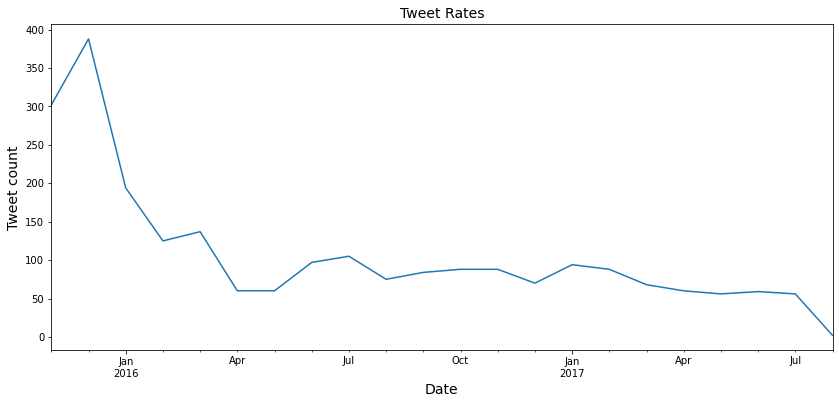

In [78]:
# Plotting tweet rates over time
import datetime
archive.plot(kind="line", figsize=(14,6))
plt.xlabel("Date",fontsize = 14)
plt.ylabel("Tweet count",fontsize = 14)
plt.title("Tweet Rates",fontsize = 14)
plt.xlim([datetime.date(2015, 11, 1), datetime.date(2017, 8, 1)])
plt.savefig("tweet_rate.png")
plt.show();

## Summary
- From the chart, it shows that the tweets reduceds between January to April and has been declining ever since

## 3. Any relationship between the favourite and retweet?

''

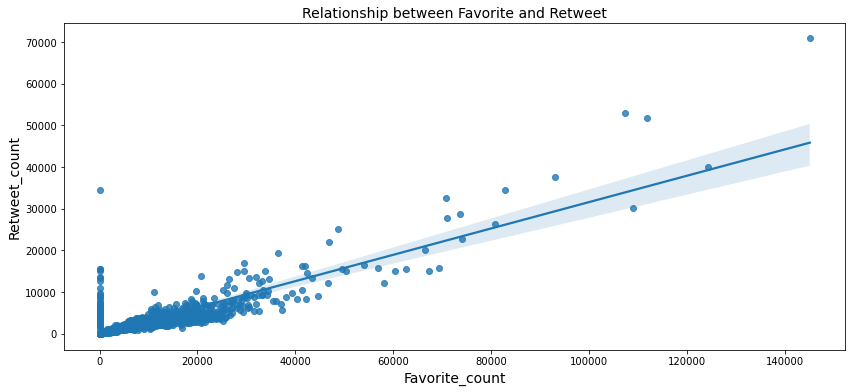

In [79]:
plt.figure(figsize=(14,6))
sns.regplot(x =twitter_archive["favorite_count"], y = twitter_archive["retweet_count"])
plt.xlabel("Favorite_count",fontsize=14)
plt.ylabel("Retweet_count",fontsize=14)
plt.title("Relationship between Favorite and Retweet",fontsize=14)
plt.savefig("relationship.png")
;

# Summary
- This graph shows that there is a positive correlation between the two datas. The majority of the data lies below forty-thousand favourite_count and ten-thousand retweet_count.

## 4. Most popular dog_stage?


In [80]:
twitter_archive["dog_stage"].value_counts()

None       1468
pupper      182
doggo        55
puppo        23
floofer       8
Name: dog_stage, dtype: int64

In [81]:
# Removing the "None"
stages =  twitter_archive["dog_stage"][twitter_archive["dog_stage"].values!="None"]
stages.value_counts()

pupper     182
doggo       55
puppo       23
floofer      8
Name: dog_stage, dtype: int64

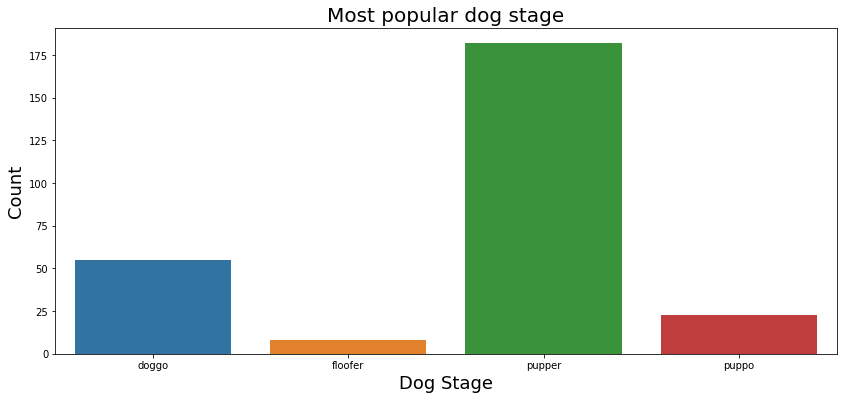

In [82]:
plt.figure(figsize=(14,6))
sns.countplot(x=stages)
plt.xlabel("Dog Stage", fontsize = 18)
plt.ylabel("Count", fontsize = 18)
plt.title("Most popular dog stage", fontsize =20)
plt.savefig("dog_stage.png");

## Summary
- From the graph, we can see that pupper is the most common stage